# STUDENT RESULTS ANALYSIS 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
df= pd.read_csv("students.csv")

In [5]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [6]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [8]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# DROP UNNAMED COLUMN

In [13]:
df = df.drop(df.columns[0], axis=1)

In [14]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# What is the distribution of students by gender? Present this data in a pie chart.

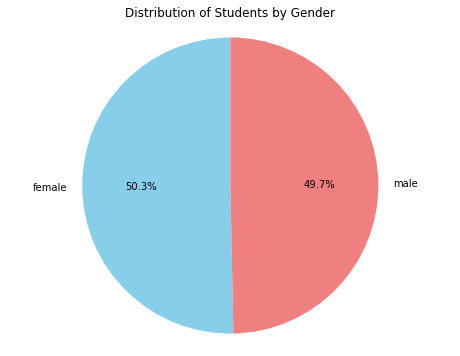

In [17]:
gender_counts = df['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Students by Gender')
plt.axis('equal') 
plt.show()

# How does the level of parental education (e.g., bachelor's degree, master's degree) correlate with average Math scores? Use a bar chart for visualization.

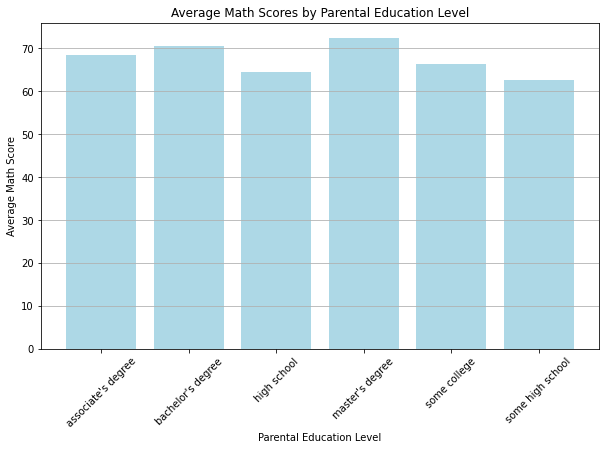

In [20]:
avg_math_scores = df.groupby('ParentEduc')['MathScore'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_math_scores['ParentEduc'], avg_math_scores['MathScore'], color='lightblue')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Math Score')
plt.title('Average Math Scores by Parental Education Level')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#  Compare the average Reading and Writing scores of students who receive standard lunch versus free/reduced lunch. Present this in a grouped bar chart.



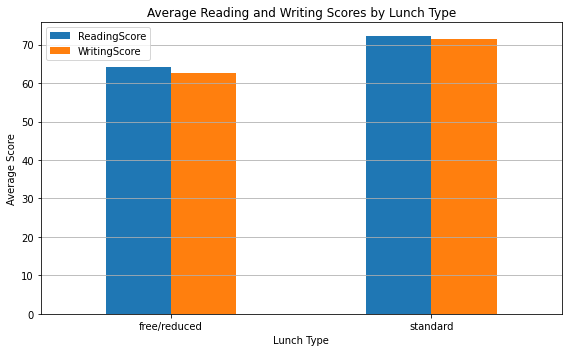

In [26]:
avg_scores = df.groupby('LunchType')[['ReadingScore', 'WritingScore']].mean().reset_index()

# Set the index to LunchType for easier plotting
avg_scores.set_index('LunchType', inplace=True)

# Create a grouped bar chart
avg_scores.plot(kind='bar', figsize=(8, 5))

# Add labels and title
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.title('Average Reading and Writing Scores by Lunch Type')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Analyze the average scores (Math, Reading, Writing) based on different ethnic groups. Which ethnic group performs the best overall?

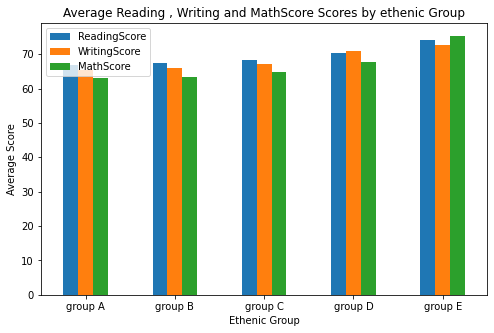

In [35]:
avg_scores = df.groupby('EthnicGroup')[['ReadingScore', 'WritingScore','MathScore']].mean().reset_index()
avg_scores.set_index('EthnicGroup', inplace=True)
avg_scores.plot(kind='bar', figsize=(8, 5))

# Add labels and title
plt.xlabel('Ethenic Group')
plt.ylabel('Average Score')
plt.title('Average Reading , Writing and MathScore Scores by ethenic Group')
plt.xticks(rotation=0)


# Show the plot
plt.show()

# Investigate how the number of weekly study hours affects Math scores. Create a scatter plot to visualize this relationship, including a trend line.

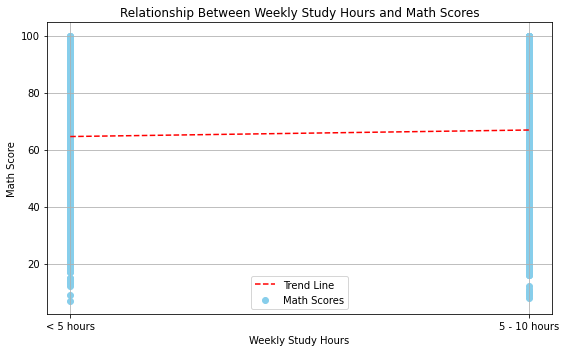

In [37]:
def study_hours_to_numeric(hours):
    if hours == '< 5':
        return 3  # Assuming average < 5 is 3 hours
    elif hours == '5 - 10':
        return 7.5  # Assuming average of 5 and 10 is 7.5 hours
    else:
        return np.nan

df['WklyStudyHoursNumeric'] = df['WklyStudyHours'].apply(study_hours_to_numeric)

# Filter out rows with NaN values in 'WklyStudyHoursNumeric'
filtered_df = df.dropna(subset=['WklyStudyHoursNumeric', 'MathScore'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(filtered_df['WklyStudyHoursNumeric'], filtered_df['MathScore'], color='skyblue', label='Math Scores')

# Fit a trend line
z = np.polyfit(filtered_df['WklyStudyHoursNumeric'], filtered_df['MathScore'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['WklyStudyHoursNumeric'], p(filtered_df['WklyStudyHoursNumeric']), color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel('Weekly Study Hours')
plt.ylabel('Math Score')
plt.title('Relationship Between Weekly Study Hours and Math Scores')
plt.xticks([3, 7.5], ['< 5 hours', '5 - 10 hours'])
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


# is there a significant difference in average Writing scores based on the marital status of the students' parents (married vs. single)? Conduct a t-test to determine statistical significance.

In [41]:
married_scores = df[df['ParentMaritalStatus'] == 'married']['WritingScore']
single_scores = df[df['ParentMaritalStatus'] == 'single']['WritingScore']

# Conduct the t-test
t_stat, p_value = stats.ttest_ind(married_scores, single_scores, nan_policy='omit')

# Print results
print(f'T-statistic: {t_stat:.3f}')
print(f'P-value: {p_value:.3f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print('There is a significant difference in average Writing scores between married and single parents.')
else:
    print('There is no significant difference in average Writing scores between married and single parents.')


T-statistic: 1.130
P-value: 0.259
There is no significant difference in average Writing scores between married and single parents.


# Explore how the number of siblings (NrSiblings) influences overall academic performance. Use a multi-line chart to show the average scores across different ranges of siblings.

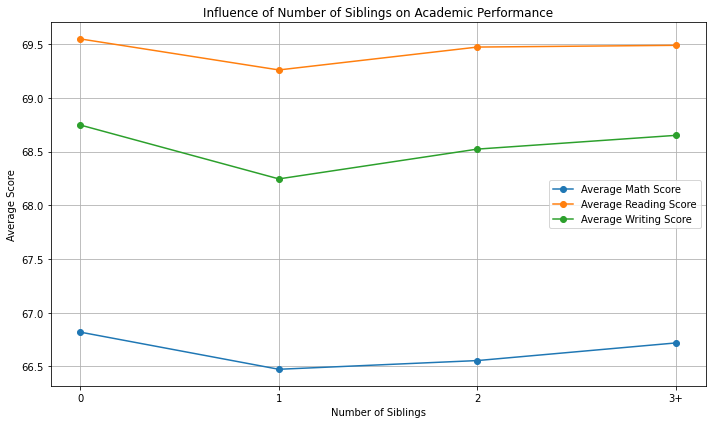

In [42]:

# Create ranges for the number of siblings
bins = [0, 1, 2, 3, 4]  # Define the ranges
labels = ['0', '1', '2', '3+']  # Label for each bin
df['SiblingRange'] = pd.cut(df['NrSiblings'], bins=bins, right=False, labels=labels)

# Calculate average scores for each sibling range
avg_scores = df.groupby('SiblingRange')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()

# Plot the multi-line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_scores['SiblingRange'], avg_scores['MathScore'], marker='o', label='Average Math Score')
plt.plot(avg_scores['SiblingRange'], avg_scores['ReadingScore'], marker='o', label='Average Reading Score')
plt.plot(avg_scores['SiblingRange'], avg_scores['WritingScore'], marker='o', label='Average Writing Score')

# Adding labels and title
plt.xlabel('Number of Siblings')
plt.ylabel('Average Score')
plt.title('Influence of Number of Siblings on Academic Performance')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# What is the relationship between transportation means and students' academic performance? Compare average scores for different transport types using a box plot.

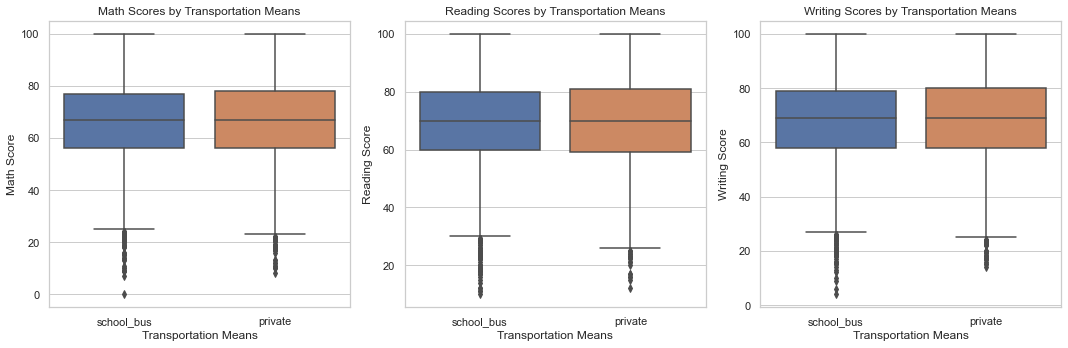

In [45]:
# Set the plot style
sns.set(style="whitegrid")

# Create box plots for each subject
plt.figure(figsize=(15, 5))

# Math Score Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='TransportMeans', y='MathScore', data=df)
plt.title('Math Scores by Transportation Means')
plt.xlabel('Transportation Means')
plt.ylabel('Math Score')

# Reading Score Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x='TransportMeans', y='ReadingScore', data=df)
plt.title('Reading Scores by Transportation Means')
plt.xlabel('Transportation Means')
plt.ylabel('Reading Score')

# Writing Score Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x='TransportMeans', y='WritingScore', data=df)
plt.title('Writing Scores by Transportation Means')
plt.xlabel('Transportation Means')
plt.ylabel('Writing Score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#  Evaluate whether participating in test preparation courses (TestPrep) has a measurable impact on students' scores in Math, Reading, and Writing. Use ANOVA for analysis.

In [46]:
completed_math_scores = df[df['TestPrep'] == 'completed']['MathScore']
none_math_scores = df[df['TestPrep'] == 'none']['MathScore']
f_stat_math, p_value_math = stats.f_oneway(completed_math_scores, none_math_scores)

# Conduct ANOVA for ReadingScore
completed_reading_scores = df[df['TestPrep'] == 'completed']['ReadingScore']
none_reading_scores = df[df['TestPrep'] == 'none']['ReadingScore']
f_stat_reading, p_value_reading = stats.f_oneway(completed_reading_scores, none_reading_scores)

# Conduct ANOVA for WritingScore
completed_writing_scores = df[df['TestPrep'] == 'completed']['WritingScore']
none_writing_scores = df[df['TestPrep'] == 'none']['WritingScore']
f_stat_writing, p_value_writing = stats.f_oneway(completed_writing_scores, none_writing_scores)

# Print results
print(f"Math ANOVA: F-statistic = {f_stat_math:.3f}, p-value = {p_value_math:.3f}")
print(f"Reading ANOVA: F-statistic = {f_stat_reading:.3f}, p-value = {p_value_reading:.3f}")
print(f"Writing ANOVA: F-statistic = {f_stat_writing:.3f}, p-value = {p_value_writing:.3f}")

# Determine significance
alpha = 0.05
if p_value_math < alpha:
    print('There is a significant difference in Math scores based on test preparation participation.')
else:
    print('There is no significant difference in Math scores based on test preparation participation.')

if p_value_reading < alpha:
    print('There is a significant difference in Reading scores based on test preparation participation.')
else:
    print('There is no significant difference in Reading scores based on test preparation participation.')

if p_value_writing < alpha:
    print('There is a significant difference in Writing scores based on test preparation participation.')
else:
    print('There is no significant difference in Writing scores based on test preparation participation.')

Math ANOVA: F-statistic = 595.555, p-value = 0.000
Reading ANOVA: F-statistic = 1398.029, p-value = 0.000
Writing ANOVA: F-statistic = 2762.826, p-value = 0.000
There is a significant difference in Math scores based on test preparation participation.
There is a significant difference in Reading scores based on test preparation participation.
There is a significant difference in Writing scores based on test preparation participation.
